In [33]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

## Загрузка данных

In [34]:
test_df = pd.read_csv('data/test.csv')
customer_df = pd.read_csv('data/train.csv')

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [36]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [37]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


## Предобработка данных

In [38]:
customer_df.TotalCharges = pd.to_numeric(customer_df.TotalCharges, errors='coerce')
customer_df.isnull().sum()

test_df.TotalCharges = pd.to_numeric(test_df.TotalCharges, errors='coerce')

In [39]:
customer_df.dropna(inplace = True)

test_df.dropna(inplace = True)

In [40]:
customer_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_df['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [41]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1
5,4291-SHSBH,Male,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0


In [42]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5624 non-null   object 
 1   gender            5624 non-null   object 
 2   SeniorCitizen     5624 non-null   int64  
 3   Partner           5624 non-null   object 
 4   Dependents        5624 non-null   object 
 5   tenure            5624 non-null   int64  
 6   PhoneService      5624 non-null   object 
 7   MultipleLines     5624 non-null   object 
 8   InternetService   5624 non-null   object 
 9   OnlineSecurity    5624 non-null   object 
 10  OnlineBackup      5624 non-null   object 
 11  DeviceProtection  5624 non-null   object 
 12  TechSupport       5624 non-null   object 
 13  StreamingTV       5624 non-null   object 
 14  StreamingMovies   5624 non-null   object 
 15  Contract          5624 non-null   object 
 16  PaperlessBilling  5624 non-null   object 
 17  

In [43]:
customer_df.SeniorCitizen = customer_df.SeniorCitizen.astype('bool')
customer_df.SeniorCitizen = customer_df.SeniorCitizen.apply(lambda x: True if x == 1 else False)

test_df.SeniorCitizen = customer_df.SeniorCitizen.astype('bool')
test_df.SeniorCitizen = customer_df.SeniorCitizen.apply(lambda x: True if x == 1 else False)

In [44]:
customer_df.set_index('customerID', inplace=True)

test_df.set_index('customerID', inplace=True)

In [45]:
customer_df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,Female,False,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,0
6035-RIIOM,Female,False,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,0
3797-VTIDR,Male,False,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,1
2568-BRGYX,Male,False,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,1
4291-SHSBH,Male,False,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,0
4635-EJYPD,Male,False,Yes,Yes,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.95,613.95,0
2607-DHDAK,Male,False,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,0
5204-QZXPU,Male,False,No,No,19,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,1
0221-NAUXK,Male,False,No,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.95,219.50,0


## Графики

In [46]:
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

Text(0.5, 1.0, '% of Senior Citizens')

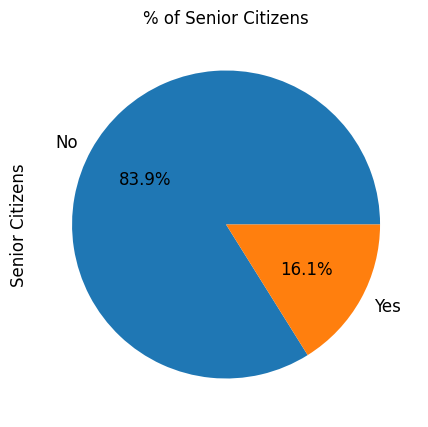

In [47]:
ax = (customer_df['SeniorCitizen'].value_counts()*100.0 /len(customer_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '# of Customers by their tenure')

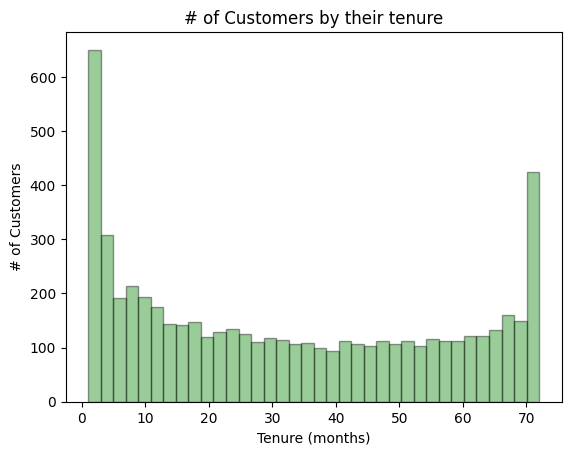

In [48]:
ax = sns.distplot(customer_df['tenure'], hist=True, kde=False, bins=int(180/5), color = 'GREEN', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 5})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

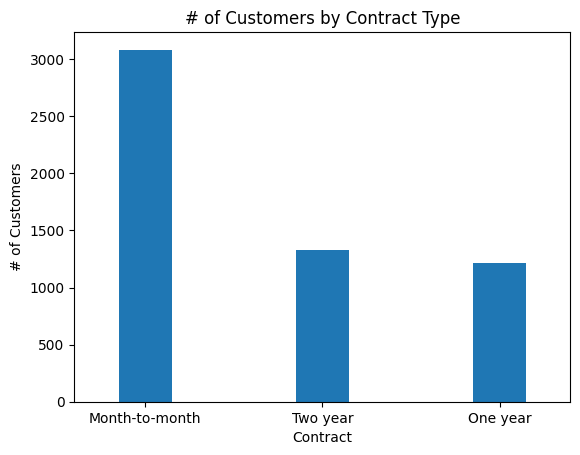

In [49]:
ax = customer_df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

## Матрица корреляций

In [50]:
categorial_columns=customer_df.select_dtypes(include=['object']).columns
categorial_columns_test=customer_df.select_dtypes(include=['object']).columns


customer_df = pd.get_dummies(customer_df, columns=categorial_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorial_columns_test, drop_first=True)

In [51]:
customer_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
4223-BKEOR,False,21,64.85,1336.80,0,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,True
6035-RIIOM,False,54,97.20,5129.45,0,False,False,False,True,False,...,False,True,False,True,False,True,True,False,False,False
3797-VTIDR,False,1,23.45,23.45,1,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2568-BRGYX,False,4,70.20,237.95,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
4291-SHSBH,False,7,69.55,521.35,0,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5624 entries, 4223-BKEOR to 4795-UXVCJ
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          5624 non-null   bool   
 1   tenure                                 5624 non-null   int64  
 2   MonthlyCharges                         5624 non-null   float64
 3   TotalCharges                           5624 non-null   float64
 4   Churn                                  5624 non-null   int64  
 5   gender_Male                            5624 non-null   bool   
 6   Partner_Yes                            5624 non-null   bool   
 7   Dependents_Yes                         5624 non-null   bool   
 8   PhoneService_Yes                       5624 non-null   bool   
 9   MultipleLines_No phone service         5624 non-null   bool   
 10  MultipleLines_Yes                      5624 non-null   bool   

<Axes: >

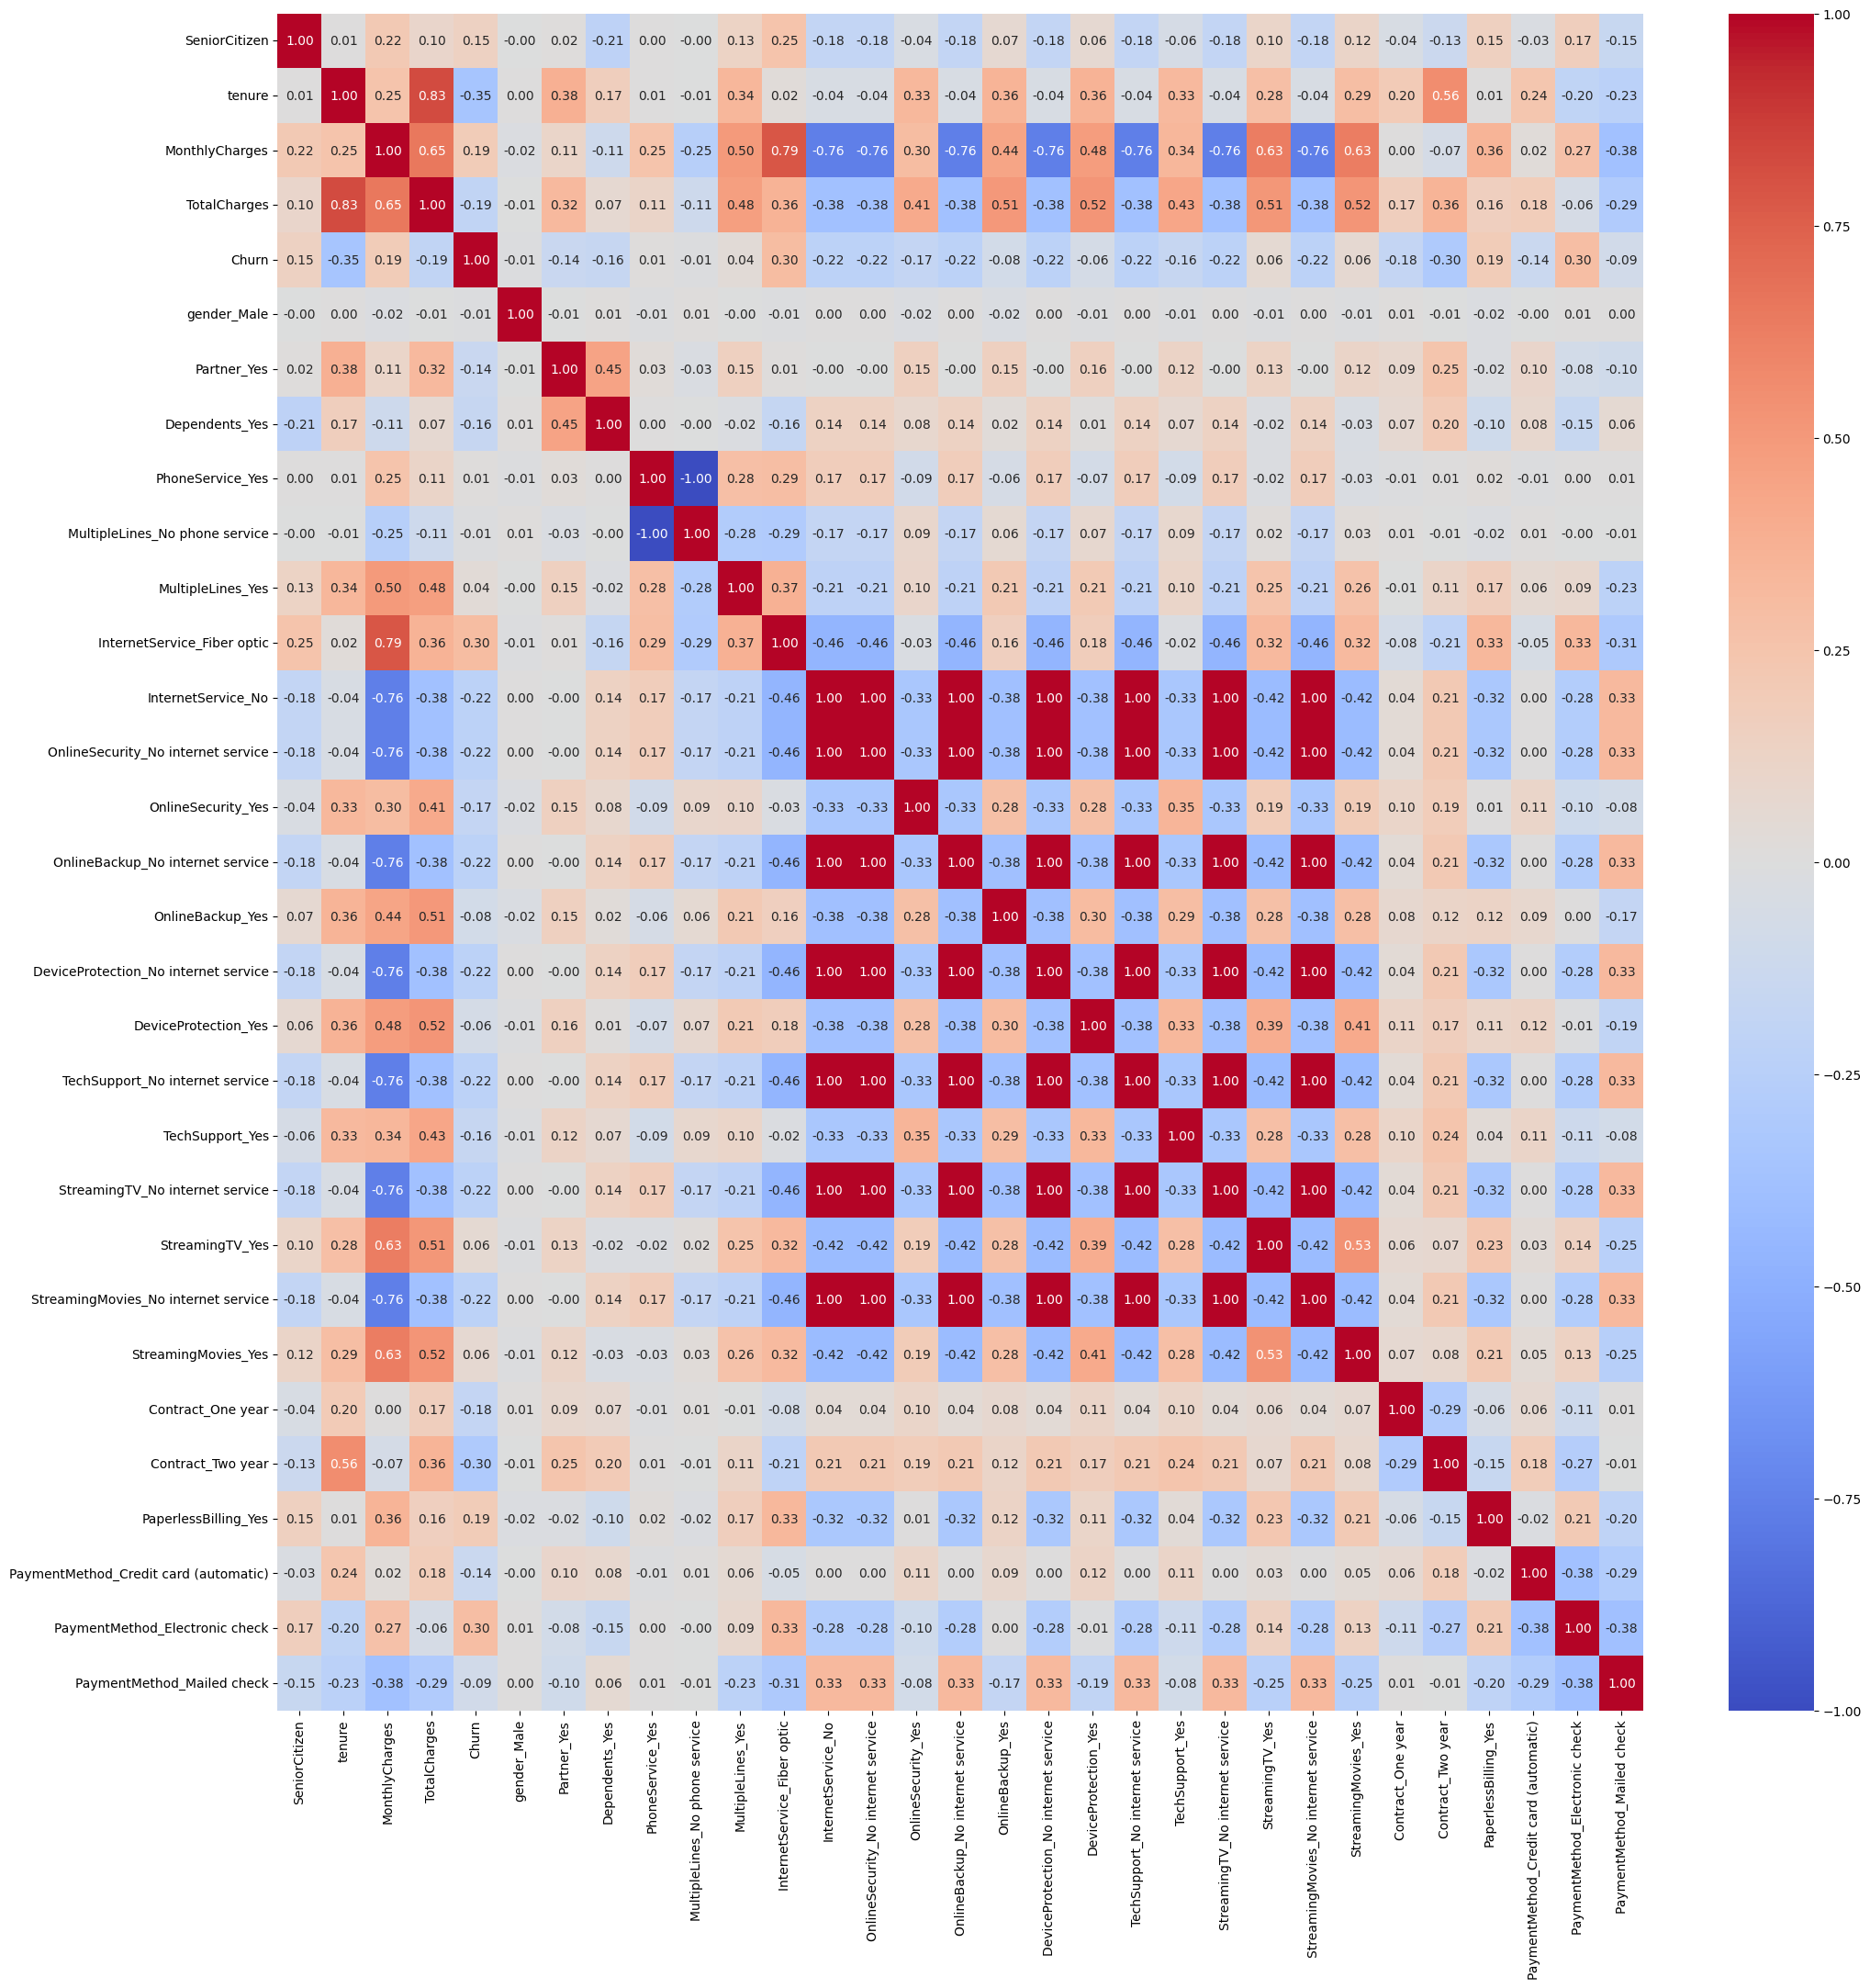

In [53]:
corr = customer_df.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1408 entries, 1024-GUALD to 5868-CZJDR
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1406 non-null   object 
 1   tenure                                 1408 non-null   int64  
 2   MonthlyCharges                         1408 non-null   float64
 3   TotalCharges                           1408 non-null   float64
 4   gender_Male                            1408 non-null   bool   
 5   Partner_Yes                            1408 non-null   bool   
 6   Dependents_Yes                         1408 non-null   bool   
 7   PhoneService_Yes                       1408 non-null   bool   
 8   MultipleLines_No phone service         1408 non-null   bool   
 9   MultipleLines_Yes                      1408 non-null   bool   
 10  InternetService_Fiber optic            1408 non-null   bool   

In [55]:
X_train = customer_df
y_train = customer_df.drop(columns='Churn')
X_test = test_df

## Пайлайн

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [60]:
numeric_columns = customer_df.select_dtypes(include=['float32', 'int64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorial_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorial_transformer, categorial_columns)
    ]
)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

## Логистическая регрессия

In [62]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

79.96 percent


## Support Vector Machine (SVM)

In [63]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

81.64


## Модель SVM с линейным ядром

In [64]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

80.06


## k - ближайших соседей

In [65]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

86.09


## Решающие деревья

In [74]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)


99.86


## Создание файла с результатами

In [82]:
submission = pd.DataFrame({
        "CustomerID": X_test.index,
        "Remaining": y_pred_decision_tree
    })

submission.to_csv('submission.csv', index=False)

In [83]:
submission.head()

,CustomerID,Remaining
0,4374,0
1,593,1
2,761,1
3,1873,0
4,5289,0
